In [1]:
import os

os.chdir('../')
os.getcwd()

'/home/bitwalk/MyProjects/stock-explorer'

# 過去データ（日足）の取得

[*********************100%%**********************]  1 of 1 completed


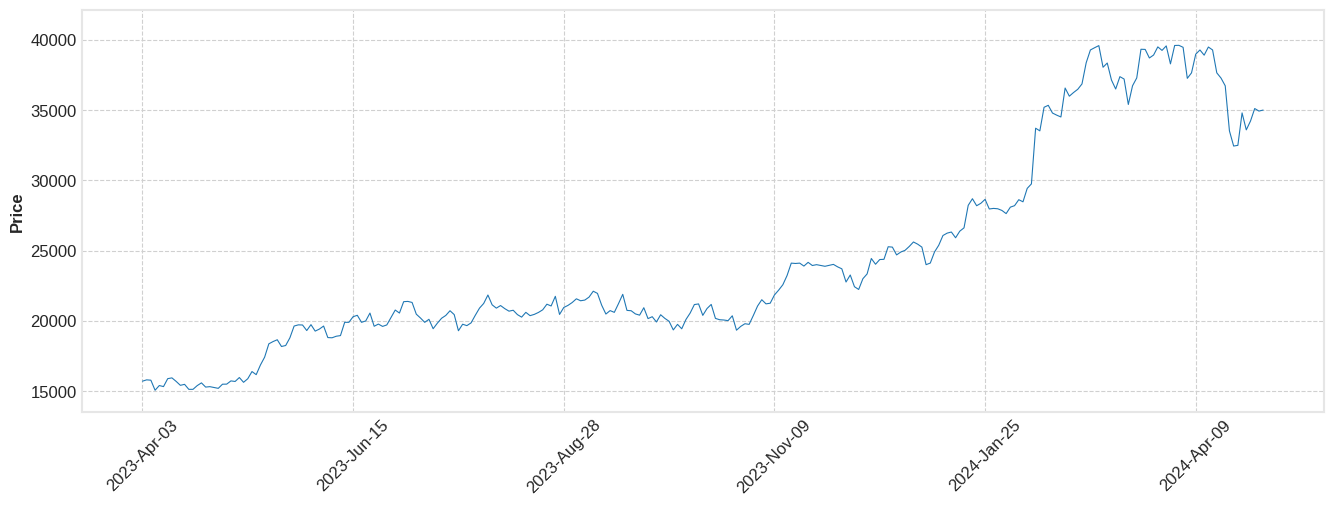

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,16040.0,16050.0,15600.0,15710.0,15509.020508,3399600
2023-04-04,15880.0,15935.0,15675.0,15805.0,15602.804688,3029900
2023-04-05,15610.0,15970.0,15585.0,15780.0,15578.124023,3264600
2023-04-06,15380.0,15380.0,14930.0,15065.0,14872.272461,4860200
2023-04-07,15250.0,15480.0,15155.0,15400.0,15202.985352,3042700
...,...,...,...,...,...,...
2024-04-25,33530.0,34360.0,33400.0,33600.0,33600.000000,3712900
2024-04-26,34250.0,34780.0,33730.0,34230.0,34230.000000,4399400
2024-04-30,35000.0,35520.0,34810.0,35120.0,35120.000000,3262700


In [73]:
import datetime as dt
import mplfinance as mpf
import yfinance as yf

start = dt.date(2023, 4, 1)
end = dt.date(2024, 5, 5)

#ticker = '7735.T' # スクリーン
ticker = '8035.T' # 東京エレクトロン
df = yf.download(ticker, start, end)
mpf.plot(df, type='line', style='binance', figratio=(12, 4))
df

# STL分解 (Seasonal Decomposition Of Time Series By Loess)

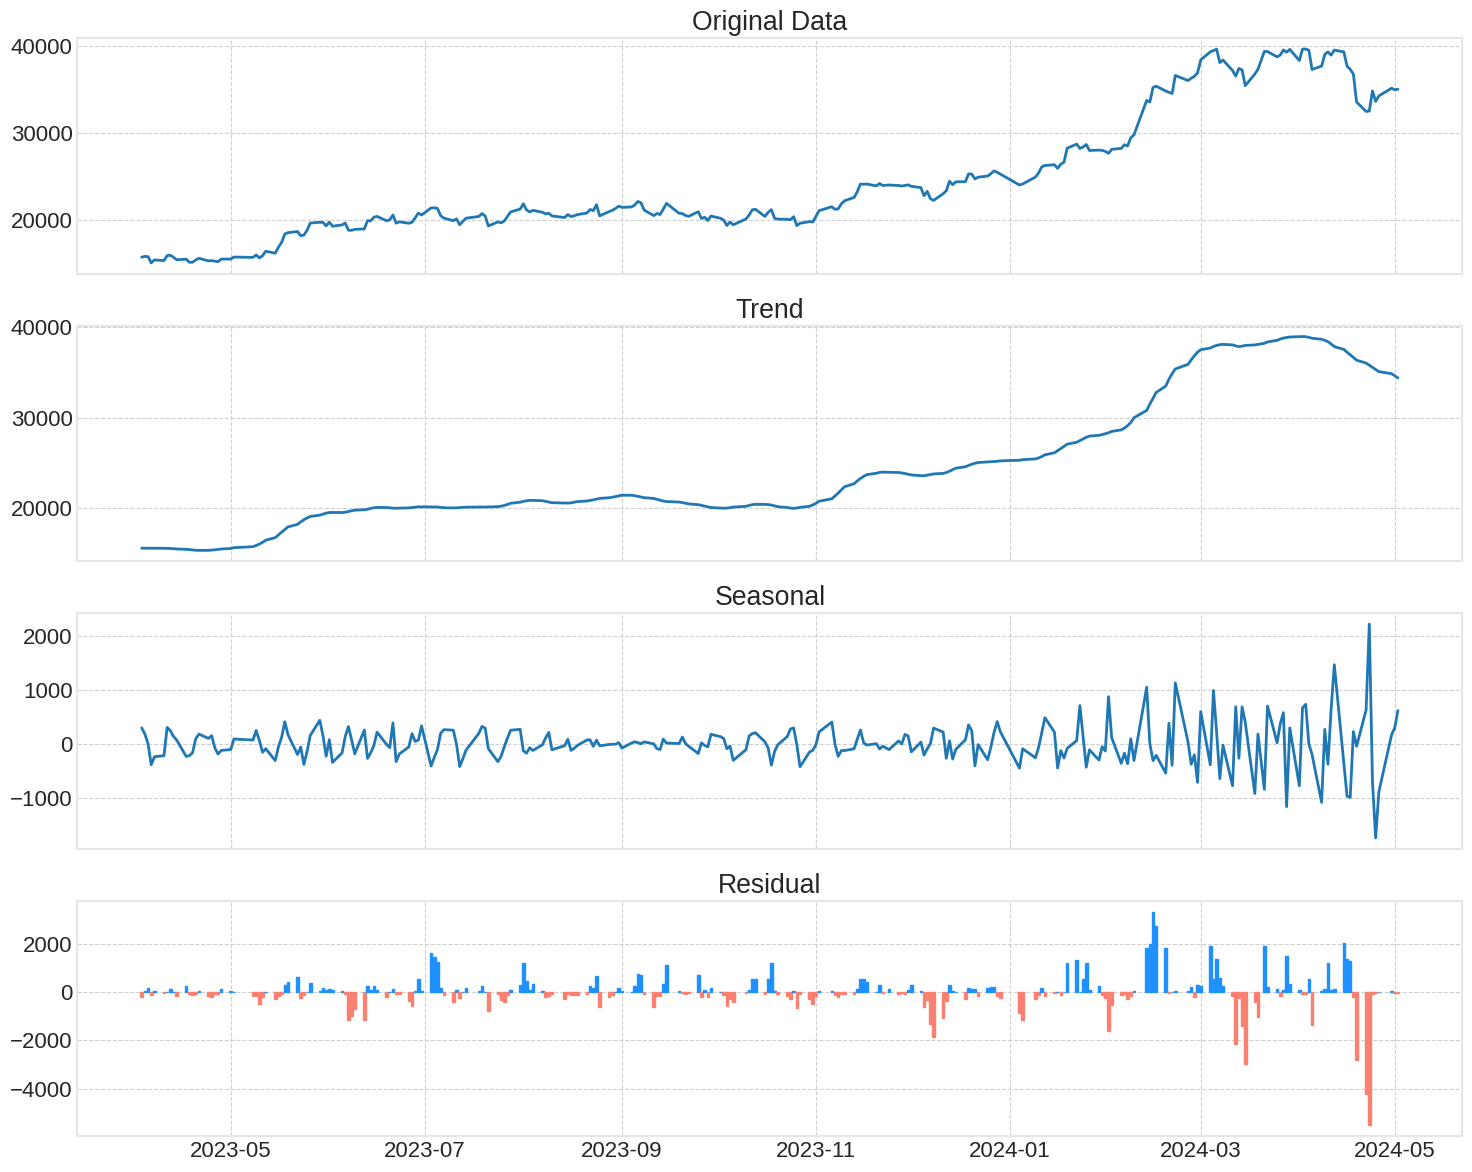

In [84]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size'     : 16,
    'axes.grid'     : True,
    'grid.linestyle': '--'
})


# STL分解
stl = sm.tsa.STL(df['Close'], period=7, robust=True).fit()

# それぞれの成分を描画
fig, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

df['Close'].plot(ax=ax[0])
ax[0].set_title("Original Data")

stl.trend.plot(ax=ax[1])
ax[1].set_title("Trend")

stl.seasonal.plot(ax=ax[2])
ax[2].set_title("Seasonal")

#stl.resid.plot(ax=ax[3])
ax[3].bar(stl.resid.index, stl.resid)
for i, delta in enumerate(stl.resid):
    if delta > 0:
        color = 'dodgerblue'
    elif delta < 0:
        color = 'salmon'
    else:
        color = 'gray'
    ax[3].get_children()[i].set_color(color)

ax[3].set_title("Residual")

plt.tight_layout()

plt.show()

In [98]:
import pandas as pd

df2 = pd.DataFrame(df['Close'])

# STL分解
stl = sm.tsa.STL(df2, period=7, robust=True).fit()
stl

In [104]:
df2['min'] = list(range(len(df2.index)))
df3 = df2.set_index('min')

In [105]:
df3

,Close
min,
0,15710.0
1,15805.0
2,15780.0
3,15065.0
4,15400.0
...,...
262,33600.0
263,34230.0
264,35120.0


In [119]:
stl = sm.tsa.STL(df3, period=5, robust=True).fit()

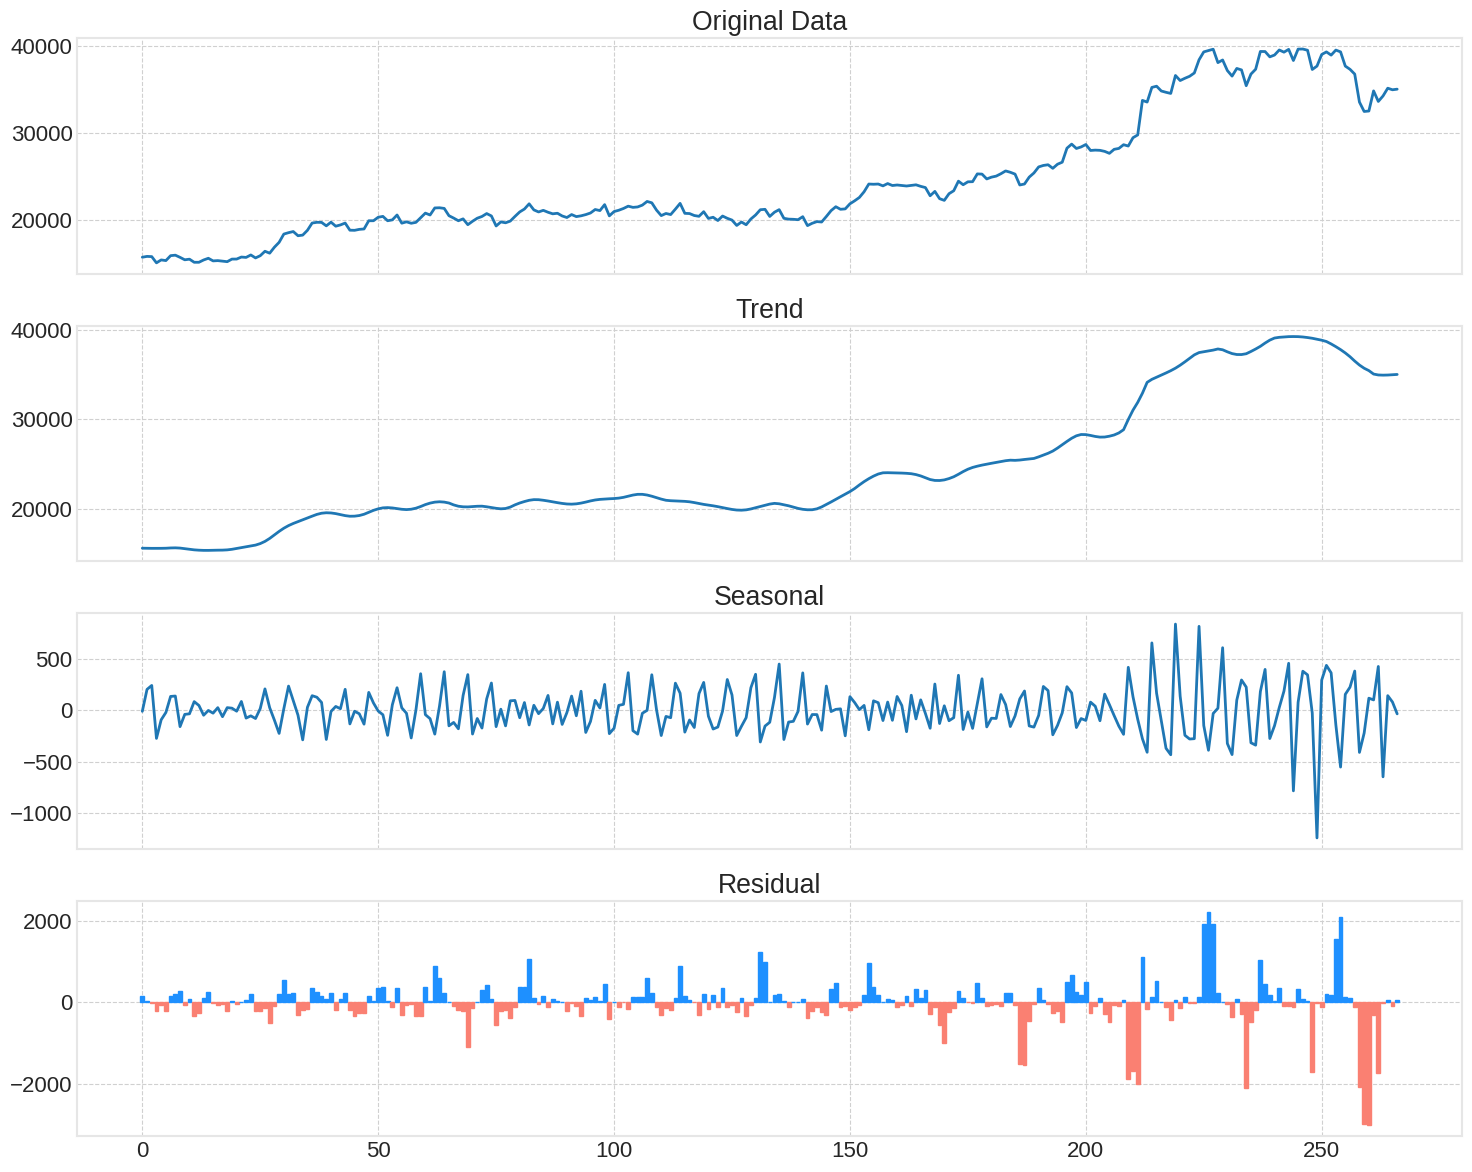

In [120]:
# それぞれの成分を描画
fig, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

#df2['Close'].plot(ax=ax[0])
ax[0].plot(df3.index, df3['Close'])
ax[0].set_title("Original Data")

stl.trend.plot(ax=ax[1])
ax[1].set_title("Trend")

stl.seasonal.plot(ax=ax[2])
ax[2].set_title("Seasonal")

#stl.resid.plot(ax=ax[3])
ax[3].bar(stl.resid.index, stl.resid)
for i, delta in enumerate(stl.resid):
    if delta > 0:
        color = 'dodgerblue'
    elif delta < 0:
        color = 'salmon'
    else:
        color = 'gray'
    ax[3].get_children()[i].set_color(color)

ax[3].set_title("Residual")

plt.tight_layout()

plt.show()